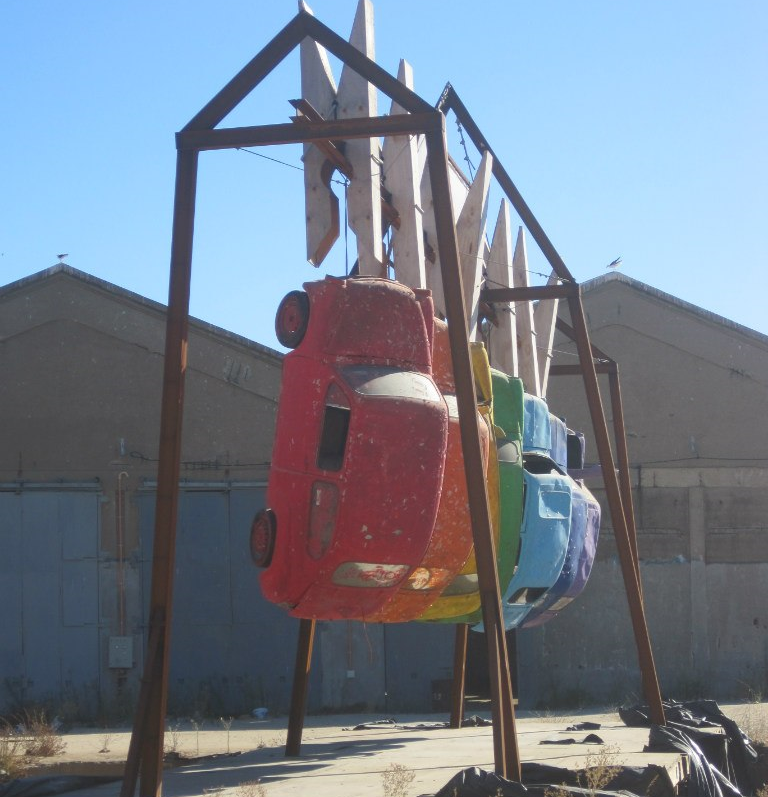

# Creating Toyplots in Python 🧸
### High-quality minimalist interactive visualizations ideal for electronic publishing 
Apart from such giants as *matplotlib*, *seaborn*, *plotly*, *bokeh*, and a couple of others, there are some amazing Python dataviz libraries that you most probably have never heard about. Some of them are designed for only one specific task like *missingno* for displaying missing value patterns or *waterfallcharts* for creating only waterfall charts. Others, though, are rather universal and can be used for creating insightful graphs of various types. In this article, we're going to explore one of such multipurpose visualization tools with a playful name – [Toyplot](https://toyplot.readthedocs.io/en/stable/) (*installation:* `pip install toyplot`). As the documentation calls it, Toyplot is "the kid-sized plotting toolkit for Python with grownup-sized goals". Its main features are:
- allowing to create live and interactive aesthetically pleasant plots with maximum data-ink ratio and minimum chartjunk,
- all graphics are adapted for further electronic publishing and can be exported in many formats including *html*, *svg*, *pdf*, *png*, *mp4*,
- the possibility to easily export the raw data used for creating a plot in the *csv* format and reproduce the same plot on another machine.
 
With Toyplot, we can create common graphics like scatter plots, line charts, bar plots, but also many other visualizations, including quite soisticated ones. 

Let's experiment with some of these types of charts. We'll use 3 datasets from Kaggle: on [weather analysis](https://www.kaggle.com/mastmustu/weather-analysis) ⛅, [shrimp prices](https://www.kaggle.com/mruanova/shrimp-prices) 🦐, and [population density](https://www.kaggle.com/tanuprabhu/population-by-country-2020) 🌍.

In [1]:
import pandas as pd

# Download and prepare the data.
climate = pd.read_csv('climate_data.csv')
climate['Average temperature (°C)'] = (climate['Average temperature (°F)']-32)/1.800
climate['Year'] = climate['Date'].str[:4]
climate = climate[climate['Year']=='2020']

shrimps = pd.read_csv('shrimp-prices.csv')
shrimps['Year'] = shrimps['Month'].str[-4:]
shrimps = shrimps.groupby(['Year']).mean().reset_index(drop=False)

population = pd.read_csv('population_by_country_2020.csv')
population = population.sort_values(['Density (P/Km²)'], ascending=False)[:10]

## Scatter Plots

Let's start with scatter plots creating one for the relationships between average temperature and average humidity in [Estes Park](https://www.estesparkweather.net/archive_reports.php) of Colorado in 2020:

In [2]:
import toyplot

x = climate['Average temperature (°C)']
y = climate['Average humidity (%)']
canvas = toyplot.Canvas(width=500, height=350)
axes = canvas.cartesian()
mark = axes.scatterplot(x, y)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="350.0px" viewBox="0 0 500.0 350.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t69a2e2f8e9784c729cb53d62649da9aa"> -20 -10 0 10 20 25 50 75 100

In [3]:
import toyplot.html
toyplot.html.render(canvas, 'fig_1.html')

Already from this basic scatter plot, we see, apart from a negative correlation between temperature and humidity, all the advantages of the library: no  cluttering elements, such as unnecessary grids, ticks, spines; nice default color; interactivity (when we place the cursor on any point of the graph area, we immediately see its coordinates). For now, we adjusted only the dimensions of the canvas using `width` and `height` parameters: those default ones are too big.

The code above shows the three main components of any chart in Toyplot:
- `canvas` – a drawing area for creating graphics,
- `axes` – a coordinate system for the canvas,
- `mark` – the ink, graphics as such (plots, labels, annotations, etc.) added on the canvas.

We can use a one-line code to obtain the same result as above:

In [73]:
# canvas, axes, mark = toyplot.scatterplot(x, y, width=500, height=350)

We're going to apply this shortcut soon, but let's see what can be further adjusted:
- Adding a plot title, x and y axes labels by using the parameters `label`, `xlabel`, and `ylabel` correspondingly.
- Changing the size and opacity of the dots to better represent overlapping. Also, as an experiment, we can change their color and marker shape, even though the default ones are good enough.
- Rotating y-tick labels to make them horizontal, increasing the distance between them and the y-axis. For these purposes, we'll use nested properties related to a Toyplot axes object, namely `axes.y.ticks.labels.angle` and `axes.y.ticks.labels.offset`.

In [4]:
canvas, axes, mark = toyplot.scatterplot(x, y, width=500, height=350,
                                         label='Temperature vs. Humidity (Estes Park, 2020)',
                                         xlabel='Temperature, °C', 
                                         ylabel='Humidity, %',
                                         size=10, opacity=0.4,
                                         color='slateblue', marker='s')
axes.y.ticks.labels.angle = 270
axes.y.ticks.labels.offset = 15

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="350.0px" viewBox="0 0 500.0 350.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="taf1fcc3aa811413fa57416f6bfe5a79a"> -20 -10 0 10 20 Temperature, °C 25 50 75 100 Humidity, % Temperature vs. Humidity (Estes Park, 2020)

In [5]:
toyplot.html.render(canvas, 'fig_2.html')

Toyplot allows to put several charts (including those of different types) on the same drawing area: all we need is to create several `mark` objects. The plots should have one shared axis, while the second one can have different scales and units for each plot. Let's add one more chart on the canvas, representing the relationships between average temperature (again) and *minimum* humidity in Estes Park of Colorado. In our case, for simplicity, both plots have the same units (%) on the y-axis:

In [6]:
y1 = climate['Average humidity (%)']
y2 = climate['Minimum humidity (%)']
canvas = toyplot.Canvas(width=500, height=350)
axes = canvas.cartesian(label='Temperature vs. Humidity (Estes Park, 2020)', 
                        xlabel='Temperature, °C',
                        ylabel='Humidity, %')
mark = axes.scatterplot(x, y1, 
                        size=10, opacity=0.4, 
                        title='Average humidity')
mark = axes.scatterplot(x, y2, 
                        size=10, opacity=0.4, 
                        title='Minimum humidity')
axes.y.ticks.labels.angle = 270
axes.y.ticks.labels.offset = 15

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="350.0px" viewBox="0 0 500.0 350.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t21250ef2a5f64f0dbaec5224b87f9e6c"> Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Average humidity Av

In [7]:
toyplot.html.render(canvas, 'fig_3.html')

In the code above, we added one more element of interactivity using the  `title` parameter. Now, if we hover with the cursor (without clicking) on a green or orange circle, we'll see the name of the corresponding variable.

Another way to show several plots together is to create several `axes` objects on a single canvas and display the charts on a grid. To do so, we should assign the `grid` parameter for each `axes` object. In our case, let's visualize both scatter plots side by side, by creating a grid of 1 row and 2 columns. Also, we'll add `ymin` and `ymax` parameters to make y-axes uniform and remove interactive labels from both plots:

In [8]:
canvas = toyplot.Canvas(width=600, height=300)

axes = canvas.cartesian(grid=(1,2,0),
                        label='Temperature vs. Average humidity', 
                        xlabel='Temperature, °C',
                        ylabel='Average humidity, %', 
                        ymin=0, ymax=100)
mark = axes.scatterplot(x, y1, size=10, opacity=0.4)
axes.y.ticks.labels.angle = 270
axes.y.ticks.labels.offset = 15

axes = canvas.cartesian(grid=(1,2,1),
                        label='Temperature vs. Minimum humidity', 
                        xlabel='Temperature, °C',
                        ylabel='Minimum humidity, %', 
                        ymin=0, ymax=100)
mark = axes.scatterplot(x, y2, size=10, opacity=0.4)
axes.y.ticks.labels.angle = 270
axes.y.ticks.labels.offset = 15

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="600.0px" height="300.0px" viewBox="0 0 600.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t61f22751dded433c9cc387712c756c26"> -20 -10 0 10 20 Temperature, °C 0 50 100 Average humidity, % Temperature vs. Average humidity -20 -10 0 10 20 Temperature, °C 0 50 100 Minimum humidity, % Temperature vs. Minimum humidity

In [9]:
toyplot.html.render(canvas, 'fig_4.html')

## Line Plots
Now, we're going to test line plots in Toyplot using our second dataset, on average shrimp prices by year. The principle behind is the same as for creating scatter plots, and all the properties and methods discussed earlier are valid also here (including optional adding and formatting markers on the line plots), so let's apply some of them:

In [10]:
x = shrimps['Year']
y = shrimps['Price']
canvas, axes, mark = toyplot.plot(x, y, width=550, height=350,
                                  label='Shrimp prices by year',
                                  xlabel='Year',
                                  ylabel='Price, USD/kg')
axes.y.ticks.labels.angle = 270
axes.y.ticks.labels.offset = 15

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="550.0px" height="350.0px" viewBox="0 0 550.0 350.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t539bdf134dfd44ba9dc28124e03e9f63"> <path d="M 64.51612903225806 243.27374413262754 L 79.03225806451613 247.99260960751025 L 93.54838709677418 202.57665035453903 L 108.06451612903226 167.39738340157794 L 122.58064516129032 131.04464196544484 L 137.09677419354838 178.20832917207622 L 151.61290322580646 100.35953260761008 L 166.1290322580645 110.19674423249757 L 180.64516129032262 145.57575152302007 L 195.16129032258064 130.02097273544388 L 209.67741935483872 131.31928492959142 L 224.19354838709677 268.1414161589933 L 238.70967741935485 240.5273144911615 L 253.2258064516129 276.979926096075 L 267.741935483871 273.4844701887546 L 282.258064516129 276.4805752521721 L 296.7741935483871 280.7000898831519 L 311.2903225806452 263.0730050933785 L 325.80645161290323 300.0 L 340.3225806451613 282.27304504144604 L 354.83870967741933 225.67162688504942 L 369.35483870967744 281.64885648656747 L 383.8709677419355 158.53390592230093 L 398.38709677419354 50.0 L 412.9032258064516 187.24657944671912 L 427.4193548387097 247.1686807150703 L 441.93548387096774 184.15060421452105 L 456.4516129032258 216.53350644162595 L 470.96774193548384 205.69759312893234 L 485.48387096774195 203.4754818735643 L 500.0 231.13951862578645" style="stroke:rgb(40%,76.1%,64.7%);stroke-opacity:1.0;stroke-width:2.0"> 1990 2000 2010 2020 Year 10 12 15 18 Price, USD/kg Shrimp prices by year

In [11]:
toyplot.html.render(canvas, 'fig_5.html')

To alter the color and width of the line, we can use the `color` and `stroke_width` parameters. Alternatively, and if we need a dashed line, we can assign a dictionary to the `style` parameter, with all the necessary properties adjusted (`'stroke'`, `'stroke-dasharray'`, and `'stroke-width'`). To specify styles, Toyplot adapted [Cascading Style Sheets (CSS)](https://developer.mozilla.org/en-US/docs/Web/CSS). Let's try this second approach:

In [12]:
canvas, axes, mark = toyplot.plot(x, y, width=550, height=350,
                                  label='Shrimp prices by year',
                                  xlabel='Year', 
                                  ylabel='Price, USD/kg',
                                  style={'stroke':'dodgerblue', 
                                         'stroke-dasharray':'5',
                                         'stroke-width':'4'})
axes.y.ticks.labels.angle = 270
axes.y.ticks.labels.offset = 15

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="550.0px" height="350.0px" viewBox="0 0 550.0 350.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t5f232cade013488088373e6122a934f8"> <path d="M 64.51612903225806 243.27374413262754 L 79.03225806451613 247.99260960751025 L 93.54838709677418 202.57665035453903 L 108.06451612903226 167.39738340157794 L 122.58064516129032 131.04464196544484 L 137.09677419354838 178.20832917207622 L 151.61290322580646 100.35953260761008 L 166.1290322580645 110.19674423249757 L 180.64516129032262 145.57575152302007 L 195.16129032258064 130.02097273544388 L 209.67741935483872 131.31928492959142 L 224.19354838709677 268.1414161589933 L 238.70967741935485 240.5273144911615 L 253.2258064516129 276.979926096075 L 267.741935483871 273.4844701887546 L 282.258064516129 276.4805752521721 L 296.7741935483871 280.7000898831519 L 311.2903225806452 263.0730050933785 L 325.80645161290323 300.0 L 340.3225806451613 282.27304504144604 L 354.83870967741933 225.67162688504942 L 369.35483870967744 281.64885648656747 L 383.8709677419355 158.53390592230093 L 398.38709677419354 50.0 L 412.9032258064516 187.24657944671912 L 427.4193548387097 247.1686807150703 L 441.93548387096774 184.15060421452105 L 456.4516129032258 216.53350644162595 L 470.96774193548384 205.69759312893234 L 485.48387096774195 203.4754818735643 L 500.0 231.13951862578645" style="stroke:rgb(11.8%,56.5%,100%);stroke-dasharray:5;stroke-opacity:1.0;stroke-width:4"> 1990 2000 2010 2020 Year 10 12 15 18 Price, USD/kg Shrimp prices by year

In [13]:
toyplot.html.render(canvas, 'fig_6.html')

## Bar Plots
With bar plots, things become more interesting. Let's investigate them by the example of the TOP10 countries by population density in 2020:

In [14]:
heights = population['Density (P/Km²)']
canvas, axes, mark = toyplot.bars(heights, width=550, height=350,
                                  label='TOP10 countries by population density in 2020',
                                  xlabel='Countries', 
                                  ylabel='Population density, P/km²')

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="550.0px" height="350.0px" viewBox="0 0 550.0 350.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t7d974868d5a6477abea0b68a1661c9aa"> 0 5 10 Countries 0 10000 20000 30000 Population density, P/km² TOP10 countries by population density in 2020

In [15]:
toyplot.html.render(canvas, 'fig_7.html')

This time the almost-default plot doesn't look particularly informative: we don't see the names of the countries! 😮 Moreover, given that these names are, presumably, quite long, we'd rather prefer a horizontal bar plot. In this case, the vertical y-axis (the categorical one) would be redundant and should be removed. Hence, we have to do the following:
- explicitly assigning a list of corresponding countries to the tick locator of the `axes` object (`axes.y.ticks.locator`),
- rotating the bars from vertical to horizontal (the `along='y'` parameter),
- increasing figure margins to see the names of the countries entirely (the `margin` parameter),
- hiding y-axis (assigning `axes.y.spine.show` to `False`).

In [16]:
countries = list(population['Country (or dependency)'])
canvas, axes, mark = toyplot.bars(heights, width=500, height=350, 
                                  along='y',
                                  margin=(45,20,45,62), 
                                  label='TOP10 countries by population density in 2020', 
                                  xlabel='Population density, P/km²')
axes.y.ticks.locator = toyplot.locator.Explicit(labels=countries)
axes.y.ticks.labels.angle = 270
axes.y.ticks.labels.offset = 52
axes.y.spine.show = False

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="350.0px" viewBox="0 0 500.0 350.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t90e9deee2656470b9dc34e74b2125588"> 0 10000 20000 30000 Population density, P/km² Monaco Macao Singapore Hong Kong Gibraltar Bahrain Holy See Maldives Malta Bangladesh TOP10 countries by population density in 2020

In [17]:
toyplot.html.render(canvas, 'fig_8.html')

Now we see the whole picture: not surprisingly, the countries with the highest population density are highly developed and economically secure microstates and islands.
## Exporting Raw Data
At the beginning of the article, we mentioned the possibility to export the data used for creating a plot as a *csv* file, for further reproducing the same visualization on any other computer. Indeed, this is very easy: you should put the cursor on any line (dot, bar, etc.) of any of the charts above that you would like to reproduce, right-click on that point, open a context menu that will pop up, and save the data:

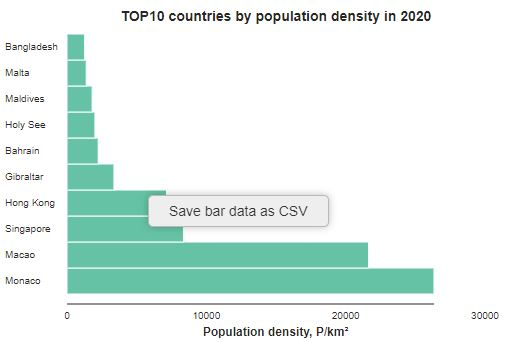

## Exporting Figures
Apart from the raw data, we can easily export the resulting figures themselves. The most preferred format is HTML, where the plots remain interactive (including the option to extract the raw data as an *csv* file) and can be included in an electronic publication conserving this feature:

In [68]:
import toyplot.html
toyplot.html.render(canvas, 'fig_1.html')

Otherwise, it's possible to export a static version of a figure in *pdf*, *png*, *svg*, or *mp4* formats, using a similar syntax:

In [83]:
import toyplot.pdf
toyplot.pdf.render(canvas, 'fig_1.pdf')

## Conclusion
There are still a lot of things that can be done with Toyplot, including:
- changing color palette or using color mapping,
- adding formatted text annotations on the plots,
- applying logarithmic scale,
- showing ticks, changing and formatting tick labels,
- adding animation effects.

Besides, there are many other types of visualizations that we can create in this library: stacked bar plots, histograms, region plots, matrices, ellipses, [graphs](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)) (in mathematical terms), image visualizations, pretty-printed tables. In this article, we just got a taste of this less known but awesome tool for creating publication-quality figures, and, hopefully, you became curious to explore more of its functionality.

Thanks for reading!